In [33]:
import mysql.connector
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123456',
    database='sales'
)
cursor = db.cursor()

In [4]:
query = """ SELECT * from madhav_sales_data"""
cursor.execute(query)
data1 = cursor.fetchall()
df = pd.DataFrame(data1, columns = [ "User_ID", "Cust_name", "Product_ID", "Gender", "Age Group", "Age", "Marital_Status", "State", "Zone", "Occupation", "Product_Category", "Orders", "Amount", "Status", "unnamed1"]) 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,,
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,,
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,,
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,,
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,,


In [5]:
print(df.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  Amount  \
0     Maharashtra   Western       Healthcare             Auto       1   23952   
1  Andhra Pradesh  Southern             Govt             Auto       3   23934   
2   Uttar Pradesh   Central       Automobile             Auto       3   23924   
3       Karnataka  Southern     Construction             Auto       2   23912   
4         Gujarat   Western  Food Processing             Auto       2   23877   

  Status unnamed1  
0                  
1                  
2       

In [65]:
df.shape

(11239, 13)

In [66]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [43]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [44]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df['Amount'].dtypes

dtype('int64')

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:
df.rename(columns= {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11235,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11236,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11237,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [49]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610908
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355971
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [50]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610908
std,12.753866,1.114967,5222.355971
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


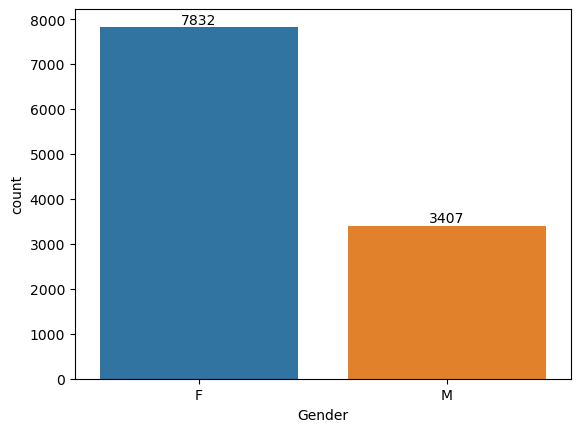

In [12]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)


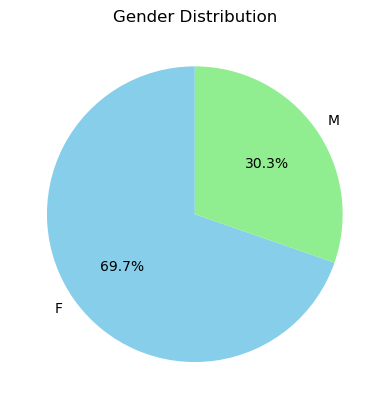

In [11]:
# plotting a bar chart for Gender and it's count

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()



<Axes: xlabel='Gender', ylabel='Amount'>

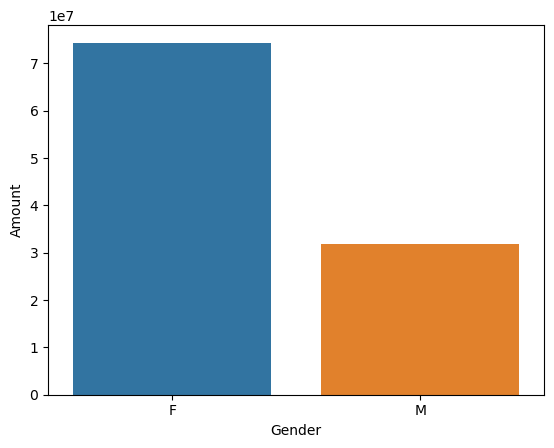

In [52]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

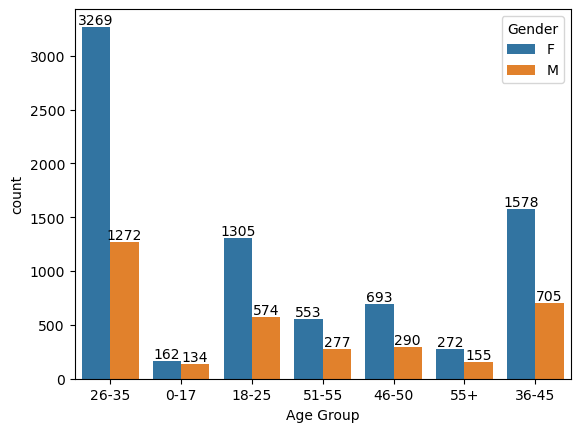

In [14]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

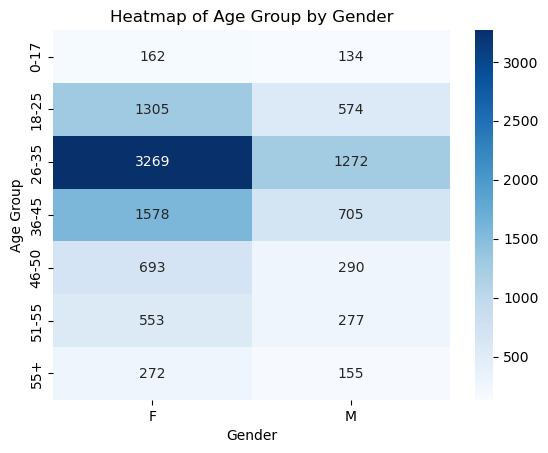

In [13]:
"""ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)"""

age_gender = pd.crosstab(df['Age Group'], df['Gender'])
sns.heatmap(age_gender, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Age Group by Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()


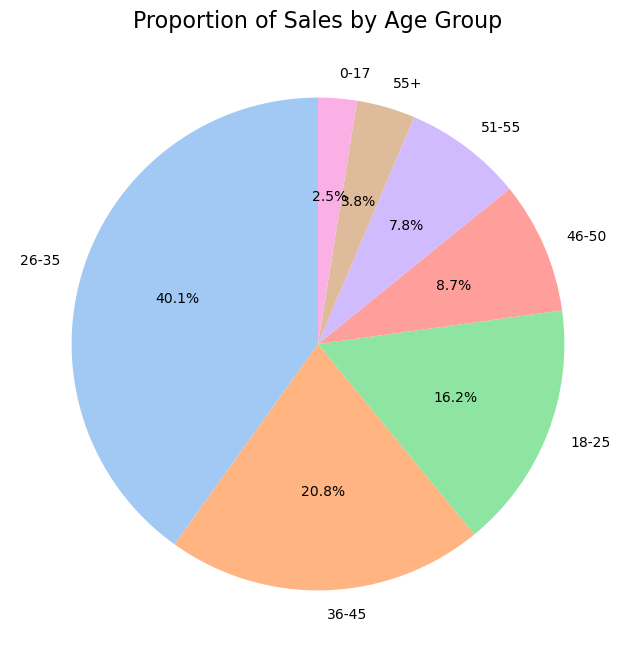

In [18]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


plt.figure(figsize=(10, 8))  # Adjust the figure size to make the pie chart larger
plt.pie(sales_age['Amount'], labels=sales_age['Age Group'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Sales by Age Group', fontsize=16)  # Increase title font size
plt.show()


<Axes: xlabel='State', ylabel='Orders'>

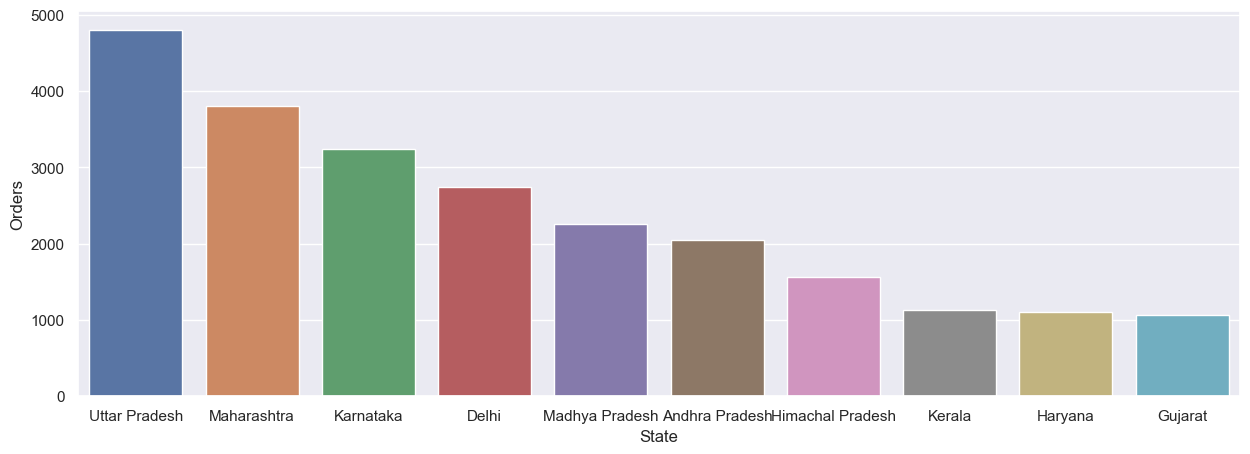

In [26]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')


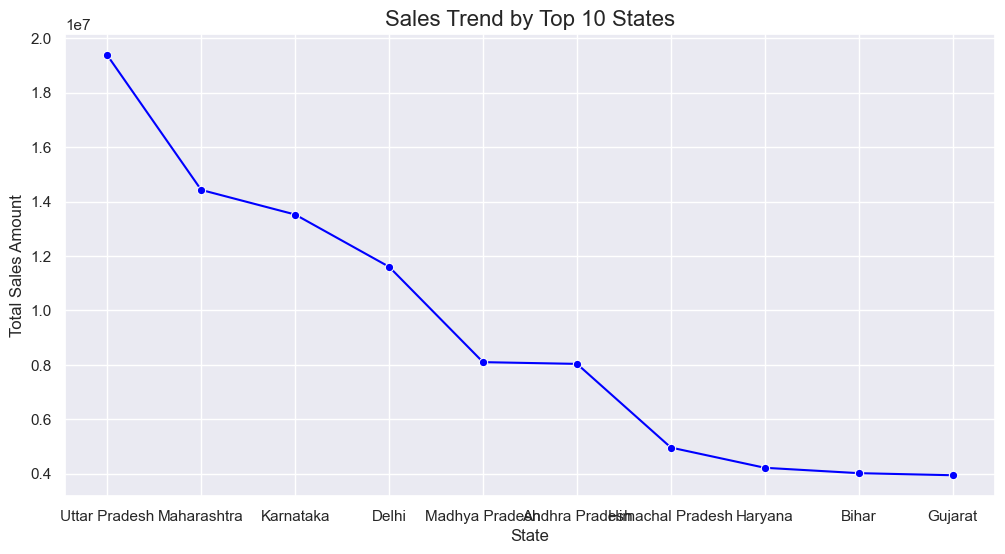

In [28]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(data=sales_state, x='State', y='Amount', marker='o', color='blue')
plt.title('Sales Trend by Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.show()



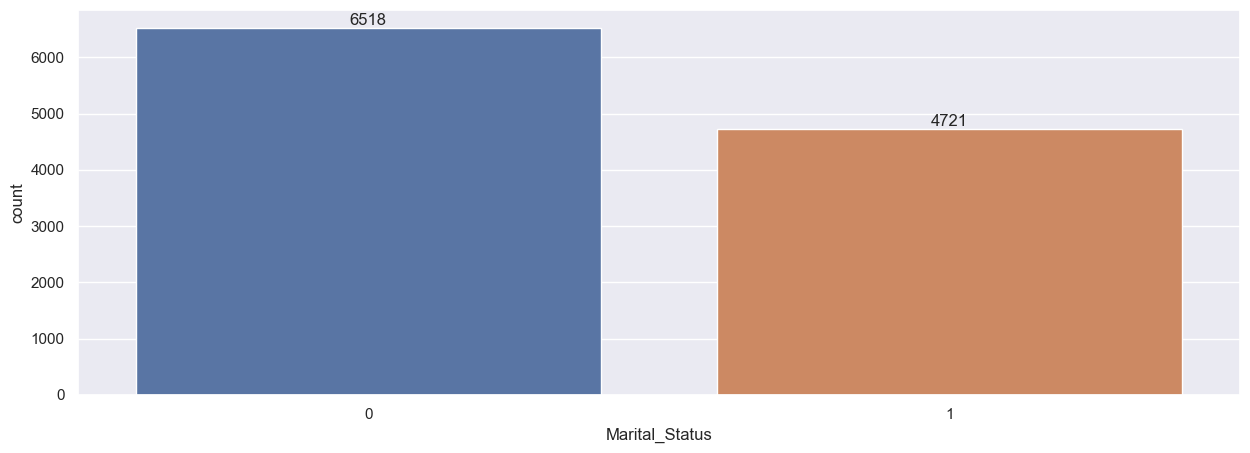

In [57]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

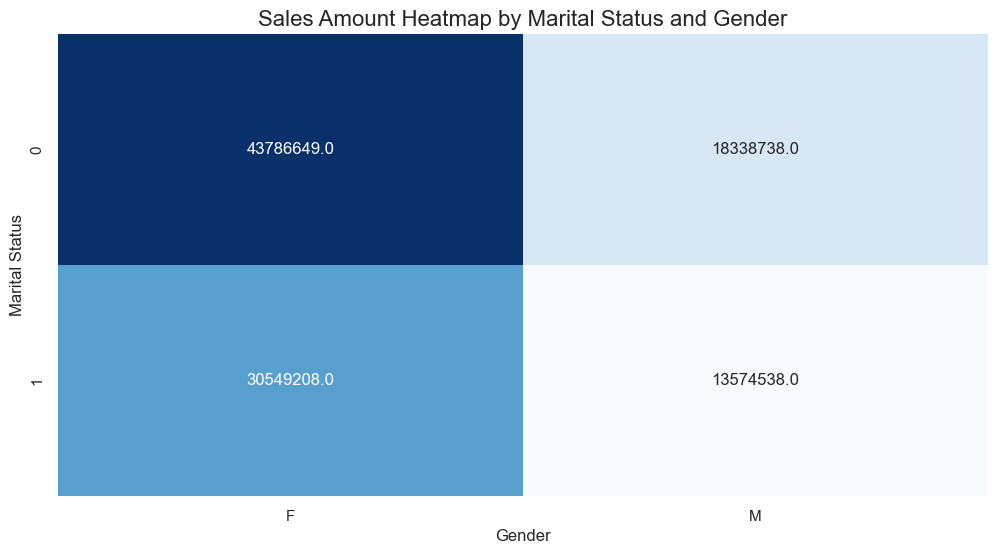

In [30]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

heatmap_data = sales_state.pivot(index='Marital_Status', columns='Gender', values='Amount')
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.title('Sales Amount Heatmap by Marital Status and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.show()


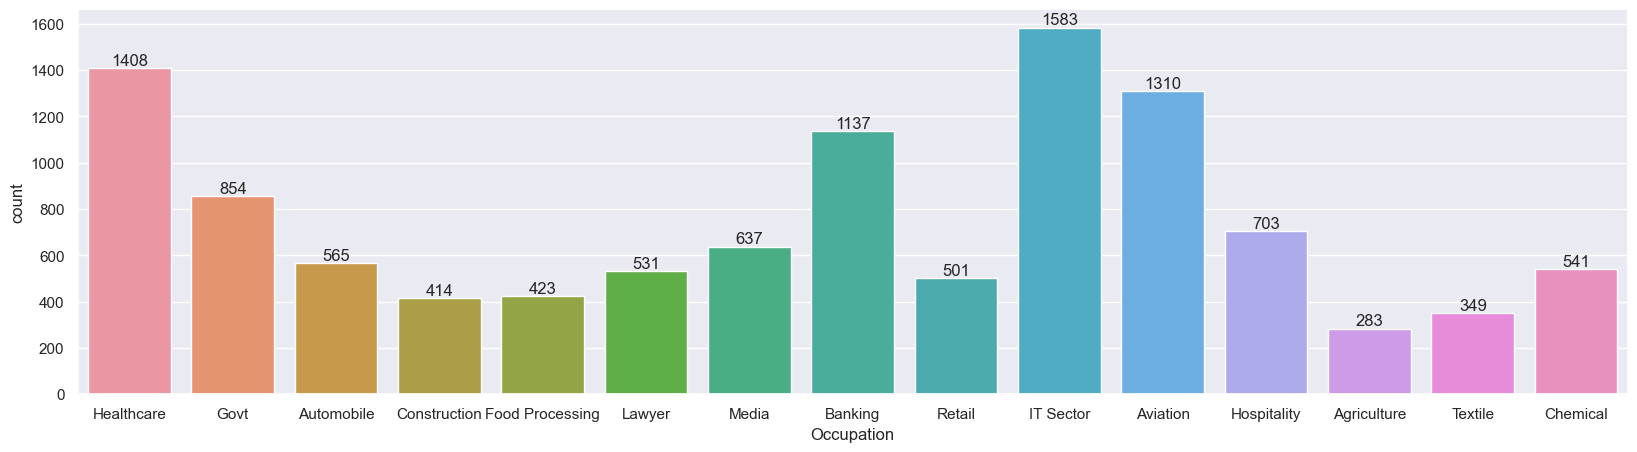

In [59]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

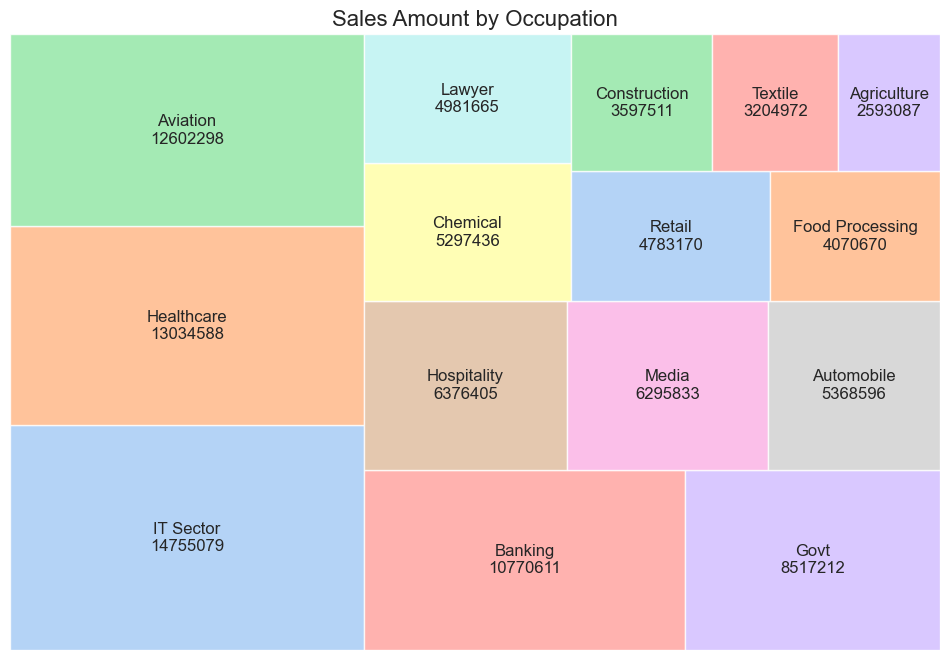

In [34]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
import squarify

sizes = sales_state['Amount']
labels = sales_state['Occupation'] + '\n' + sales_state['Amount'].astype(str)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette('pastel'), alpha=0.8)
plt.title('Sales Amount by Occupation', fontsize=16)
plt.axis('off')
plt.show()


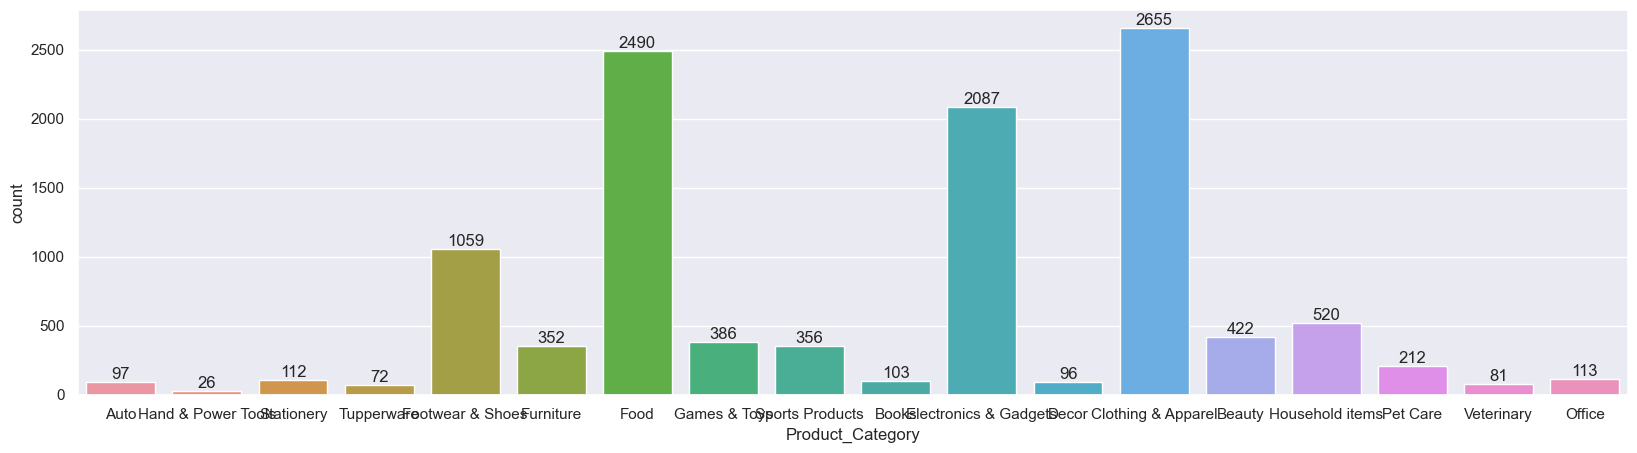

In [61]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

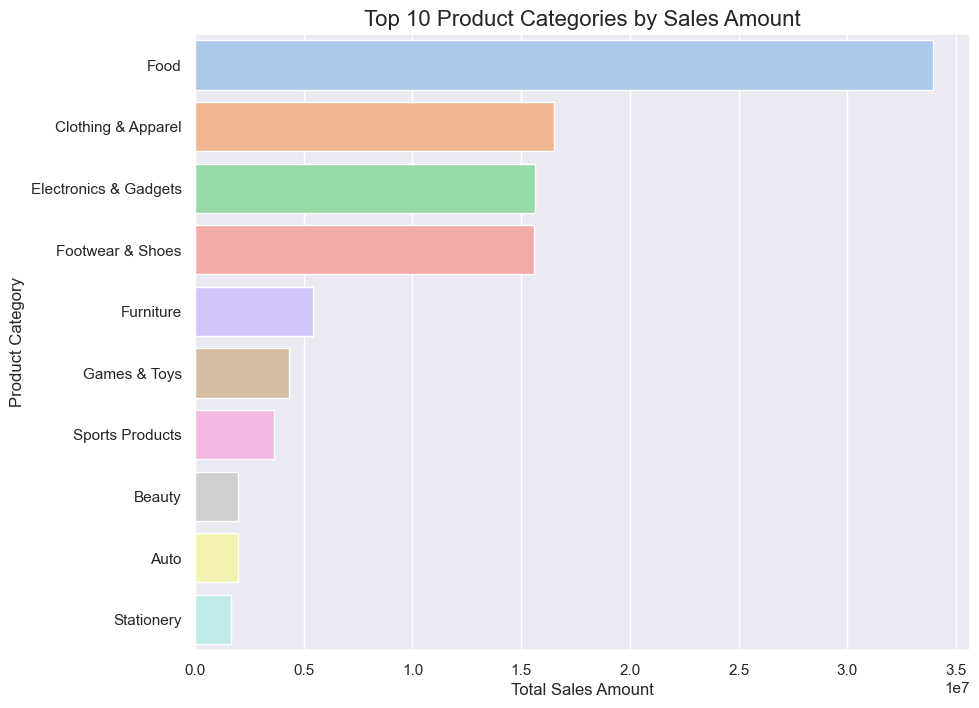

In [39]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (10, 8)})
sns.barplot(data=sales_state, y='Product_Category', x='Amount', palette='pastel')
plt.title('Top 10 Product Categories by Sales Amount', fontsize=16)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


<Axes: xlabel='Product_ID', ylabel='Orders'>

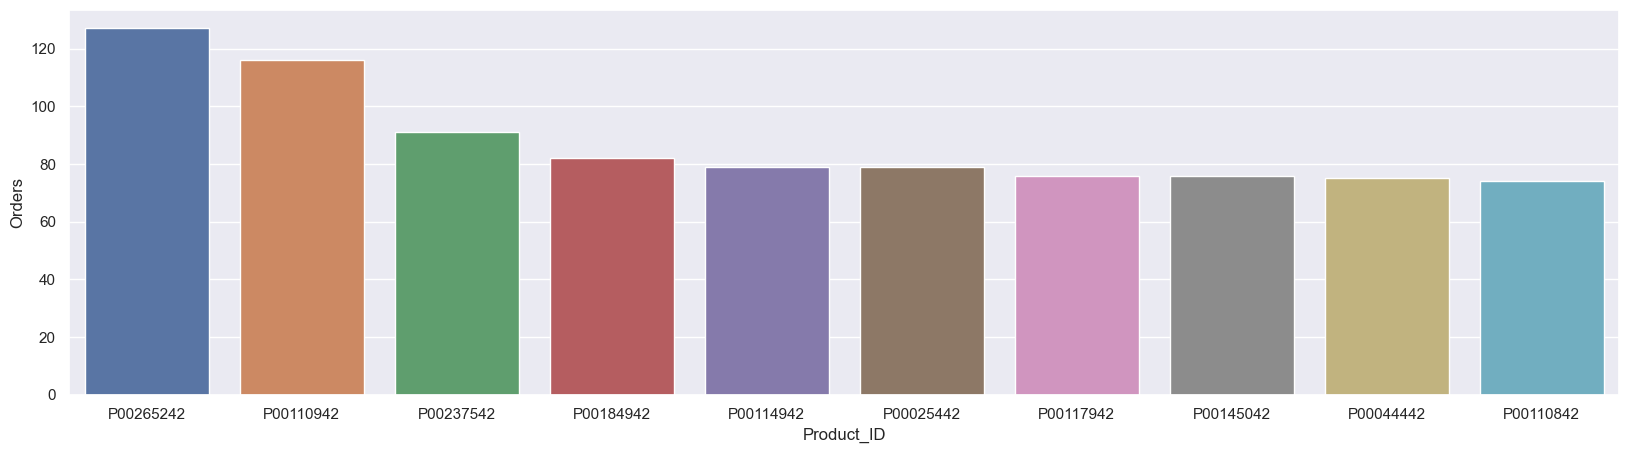

In [63]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

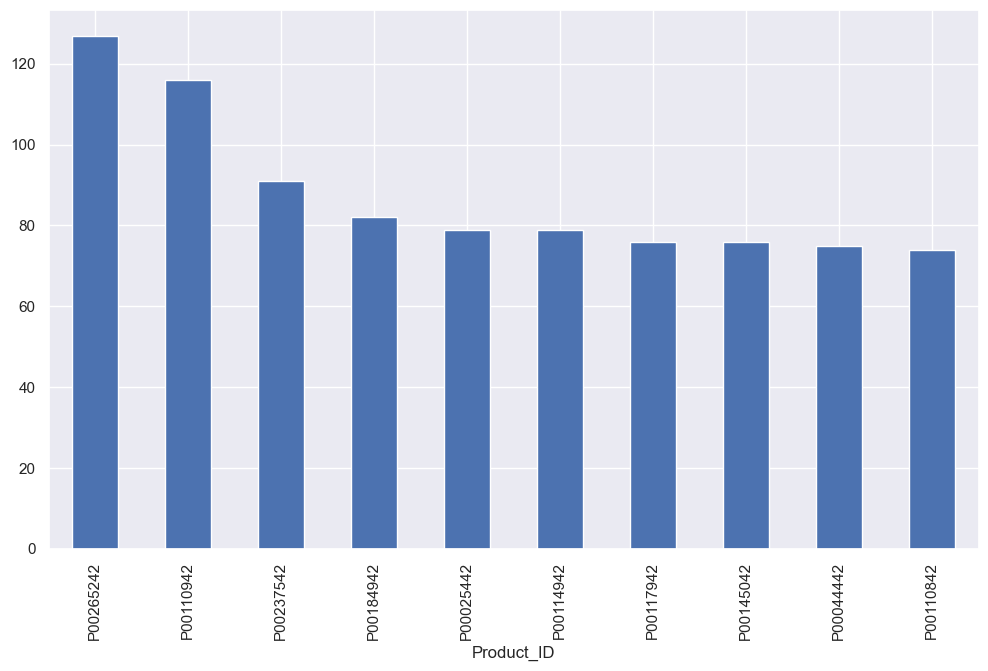

In [64]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')